In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="eyr7bn34HVCAT0XoWP3m")
project = rf.workspace("object-detection-9p5ol").project("tanaman-herbal-nfwdi")
version = project.version(7)
dataset = version.download("folder")
                

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = 'Tanaman-Herbal-7/train'
valid_dir = 'Tanaman-Herbal-7/val'
test_dir = 'Tanaman-Herbal-7/test'

train_datagen = ImageDataGenerator(
    rescale=1./255,             # Normalisasi gambar
    rotation_range=40,          # Rotasi gambar hingga 40 derajat
    shear_range=0.2,            # Distorsi bentuk gambar
    zoom_range=0.2,             # Zoom gambar hingga 20%
    horizontal_flip=True,       # Membalikkan gambar secara horizontal
    fill_mode='nearest'         # Mengisi ulang piksel yang hilang setelah augmentasi
)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = valid_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

class_names = ['Daun Jambu Biji',
 'Daun Jeruk',
 'Daun Kumis Kucing',
 'Daun Kunyit',
 'Daun Pandan',
 'Daun Pepaya',
 'Daun Sirih',
 'Daun Sirsak',
 'Daung Nangka',
 'Lidah Buaya']

Found 1725 images belonging to 10 classes.
Found 177 images belonging to 10 classes.
Found 85 images belonging to 10 classes.


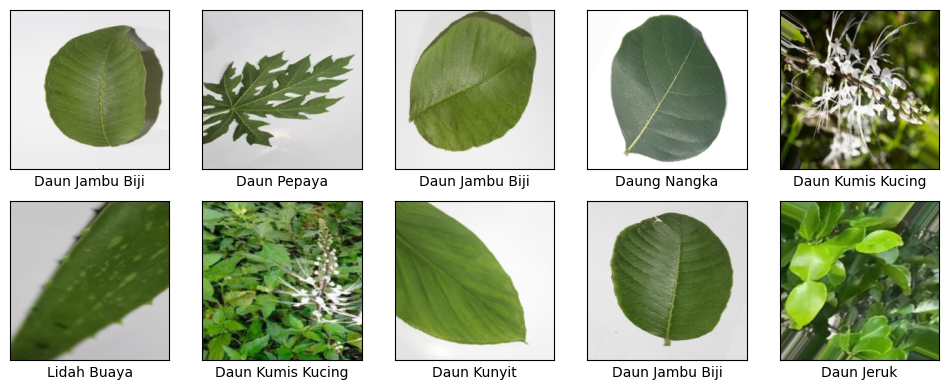

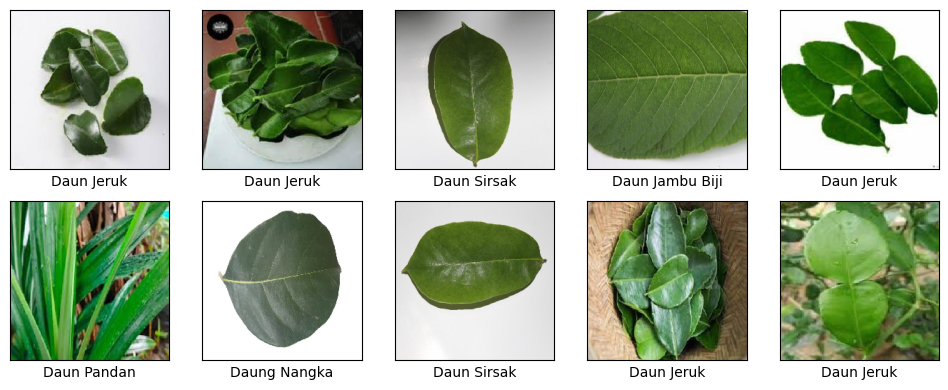

In [7]:
from matplotlib import pyplot as plt
import numpy as np

plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img, label = next(train_generator)
    plt.imshow(img[0])
    plt.xlabel(class_names[label[0].argmax()])
plt.show()

plt.figure(figsize=(12, 12))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    img, label = next(test_generator)
    plt.imshow(img[0])
    plt.xlabel(class_names[label[0].argmax()])
plt.show()

In [13]:
import tensorflow_hub as hub
feature_extractor_model = "https://www.kaggle.com/models/google/mobilenet-v2/TensorFlow2/tf2-preview-feature-vector/4"
classifier = tf.keras.Sequential([
    hub.KerasLayer(feature_extractor_model,)
])


In [16]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
prediction_layer = tf.keras.layers.Dense(10)

In [23]:
history = model.fit(train_generator,
                    epochs=20,
                    validation_data=valid_generator)

Epoch 1/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 358ms/step - accuracy: 0.3187 - loss: 13.7510 - val_accuracy: 0.3446 - val_loss: 14.9343
Epoch 2/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - accuracy: 0.3405 - loss: 13.6367 - val_accuracy: 0.3446 - val_loss: 13.7505
Epoch 3/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - accuracy: 0.3126 - loss: 13.7339 - val_accuracy: 0.3390 - val_loss: 14.7522
Epoch 4/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 359ms/step - accuracy: 0.3439 - loss: 13.7646 - val_accuracy: 0.3559 - val_loss: 13.8415
Epoch 5/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 363ms/step - accuracy: 0.3523 - loss: 13.3586 - val_accuracy: 0.3559 - val_loss: 13.8415
Epoch 6/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 24s 398ms/step - accuracy: 0.3337 - loss: 13.6727 - val_accuracy: 0.3559 - val_loss: 13.8415
Epoch 7/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 368ms/step - accuracy: 0.3421 - loss: 13.7284 - val_accuracy: 0.3503 - val_loss: 14.2968
Epoch 8/20
54/54 ━━━━━━━━━━━━━━━━━━━━ 22s 366ms/step - accuracy: 0.3365 - loss: 13.

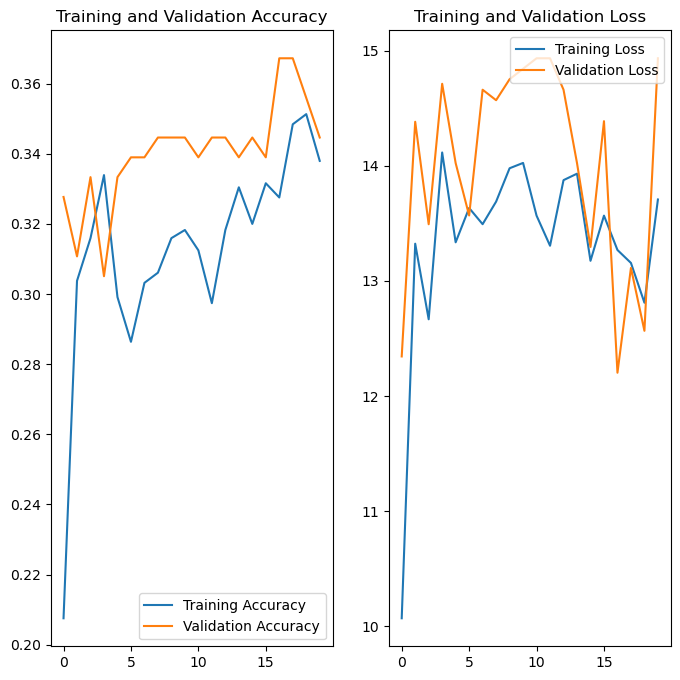

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [101]:
# save model
model.save('model.keras')

In [102]:
model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 176ms/step - accuracy: 0.7828 - loss: 0.6585


[0.6435133218765259, 0.800000011920929]

In [21]:
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def preprocess_image(image_path, img_size):
    # Baca gambar
    img = cv2.imread(image_path)
    
    # Resize gambar sesuai dengan input model
    img = cv2.resize(img, (img_size, img_size))
    
    # Konversi gambar ke array dan normalisasi
    img_array = img_to_array(img) / 255.0
    
    # Tambahkan dimensi batch: (height, width, channels) -> (1, height, width, channels)
    img_array = np.expand_dims(img_array, axis=0)
    
    return img_array


In [22]:
# Path ke gambar yang ingin diprediksi
image_path = 'Tanaman-Herbal-7/test/Daun Kunyit/kunyit-85-_JPG.rf.9095aeb6d3e42019da34111508abb852.jpg'
# Preprocessing gambar (misalnya ukuran gambar input yang diharapkan model adalah 224x224)
img_size = 224
preprocessed_image = preprocess_image(image_path, img_size)

# Prediksi menggunakan model
predictions = model.predict(preprocessed_image)

# Tampilkan hasil prediksi
print("Predictions:", predictions)

# Ambil kelas dengan probabilitas tertinggi
predicted_class = np.argmax(predictions, axis=1)

# Cetak kelas yang diprediksi
print("Predicted class:", predicted_class)

class_names = ['Daun Jambu Biji',
 'Daun Jeruk',
 'Daun Kumis Kucing',
 'Daun Kunyit',
 'Daun Pandan',
 'Daun Pepaya',
 'Daun Sirih',
 'Daun Sirsak',
 'Daung Nangka',
 'Lidah Buaya']
# Konversi indeks prediksi menjadi nama kelas
predicted_class_name = class_names[predicted_class[0]]

print("Predicted class:", predicted_class_name)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
Predictions: [[-3.013386  -5.02738    2.4723954  2.9115047 -3.645245   1.3740096
   3.4728527 -2.8939762  1.7242925  2.6043591]]
Predicted class: [6]
Predicted class: Daun Sirih
